# Szeregi czasowe

In [1]:
from pandas import Series
import pandas as pd
import matplotlib.pyplot as plt

# Zadanie
Wczytaj dane "Minimum Daily Temperatures Dataset", które podają temperaturę w stopniach celsjuszaw w Australji.

In [7]:
series = Series.from_csv('./daily-minimum-temperatures.csv', header=0)
series.head()

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: float64

# Zadanie
Wykonaj Line Plot

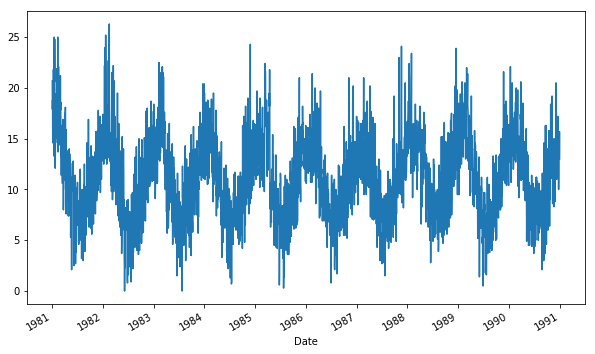

In [8]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

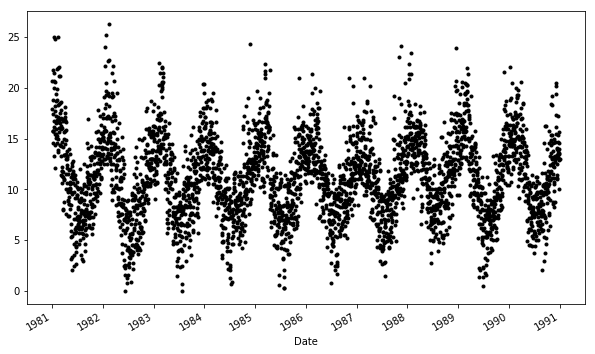

In [9]:
plt.figure(figsize=(10,6));
series.plot(style='k.')
plt.show()

# Zadanie

Zapoznaj się z poniższymi linkami

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Grouper.html
http://pandas.pydata.org/pandas-docs/version/0.18.1/generated/pandas.Series.groupby.html

i wykonaj rysunek szerefu czasowego po podziale na kolejne lata.

In [7]:
from pandas import DataFrame
from pandas import TimeGrouper
groups = series.groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    #print(name.year)
    #print(group.values[0:363].shape)
    years[name.year] = group.values[0:363]

C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
years.plot(subplots=True, legend=False)
plt.show()
# podział na fragmenty i każdy fragment robimy osobni

# Zadanie
Narysuj histogram.

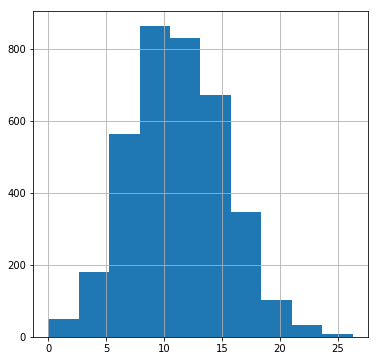

In [9]:
plt.figure(figsize=(6,6));
series.hist()
plt.show()

# Zadanie 
Narysuj estymację gęstości.

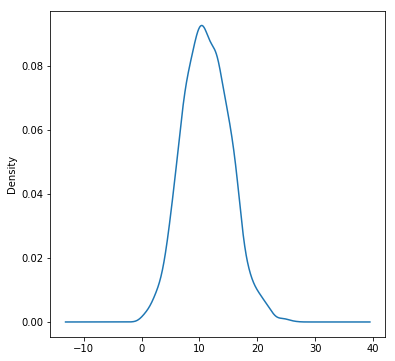

In [10]:
plt.figure(figsize=(6,6));
series.plot(kind='kde')
plt.show()

# Zadanie
Narysuj wykresy pudełkowe (Box and Whisker) dla danych podzielonych na poszczegulne lata. 

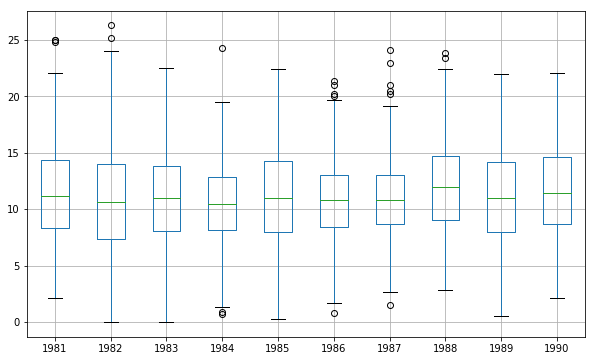

In [11]:
plt.figure(figsize=(10,6));
years.boxplot()
plt.show()

# Zadanie
Wykonaj analogiczne zadanie dla jednego roku "1990" z podziałem na miesiące. 

In [12]:
from pandas import concat
one_year = series['1990']
groups = one_year.groupby(TimeGrouper('M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
months.head()

C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until


1     2     3     4     5     6    7     8     9     10    11    12
0  14.8  12.0  19.3  15.3  13.0   9.7  7.4   6.8   6.0  11.3  15.4  13.3
1  13.3  12.2  17.3  14.7  13.9   8.2  7.3   9.8   9.5  10.5  11.8  13.2
2  15.6  14.8  19.0  11.0  12.6   8.4  7.7   5.7   8.6   9.9  13.0  16.2
3  14.5  14.8  19.8  12.2  14.3   8.5  7.7   8.6   7.6  11.0  11.1  17.3
4  14.3  14.4  19.3  14.2  16.0  10.4  9.3  10.6  10.4  14.0  12.5  20.5

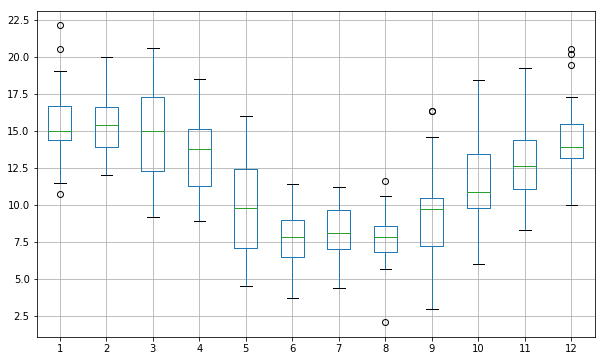

In [13]:
plt.figure(figsize=(10,6));
months.boxplot()
plt.show()
# oś x wszystkie temperatury w styczniu lutym, ... do grudnia

# Zadanie 
narysuj Heat Maps dla danych:

- na osi oy kolejne lata
- na osi ox minimalne temperatury w kolejnych latach

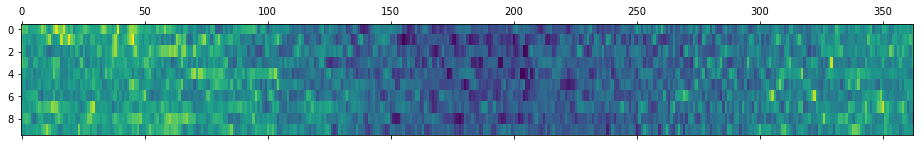

In [14]:
years_T = years.T
plt.matshow(years_T, interpolation=None, aspect='auto')
plt.show()
# każda linia jest rokiem, 365 dni, jasne kolory niskie wartości(zima), ciemne niebieskie wysokie temp (lato)

# Zadanie
Wykonaj analogiczne zadanie dla jednego roku.

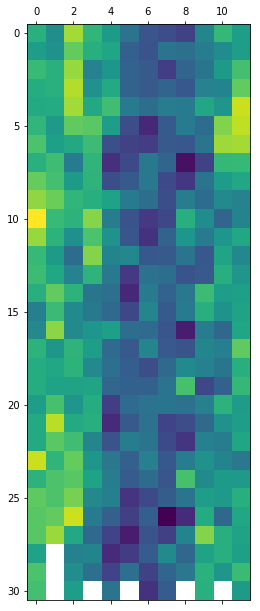

In [15]:
plt.matshow(months, interpolation=None, aspect='auto')
plt.show()
# jeden słupek = jeden miesiac - australia